<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/%EC%A3%BC%EC%8B%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주식가격 예측(LSTM)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout,Dense,Activation
import datetime

Using TensorFlow backend.


# Data입력

In [3]:
data = pd.read_csv("KEP.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,22.25,22.570000,22.129999,22.379999,19.375742,924000
1,2014-10-17,22.17,22.260000,22.040001,22.120001,19.150646,405600
2,2014-10-20,22.33,22.660000,22.330000,22.559999,19.531582,402200
3,2014-10-21,22.90,22.959999,22.790001,22.870001,19.799967,421300
4,2014-10-22,22.67,22.850000,22.650000,22.790001,19.730709,425200


# Compute Mid Price

In [0]:
high_prices = (data['High'].values)
low_prices = (data['Low'].values)
mid_prices = (high_prices + low_prices)/2

#Create Windows

In [0]:
seq_len = 50
sequence_length = seq_len + 1


result = []
for index in range(len(mid_prices) - sequence_length):
  result.append(mid_prices[index:index + sequence_length])

# Normalize Data

In [6]:
normalized_data = []
for window in result:
  normalized_window = [((float(p)/float(window[0]))-1) for p in window]
  normalized_data.append(normalized_window)
  
  
result = np.array(normalized_data)


row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1087, 50, 1), (121, 50, 1))

# Build a Model

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Traing

In [8]:
model.fit(x_train, y_train,
  validation_data=(x_test, y_test),
  batch_size=10, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1087 samples, validate on 121 samples
Epoch 1/20





1087/1087 [==============================] - 28s 26ms/step - loss: 0.0014 - val_loss: 5.5794e-04
Epoch 2/20
1087/1087 [==============================] - 22s 21ms/step - loss: 7.0443e-04 - val_loss: 3.8859e-04
Epoch 3/20
1087/1087 [==============================] - 23s 21ms/step - loss: 5.3275e-04 - val_loss: 8.6599e-04
Epoch 4/20
1087/1087 [==============================] - 22s 20ms/step - loss: 4.0995e-04 - val_loss: 2.5880e-04
Epoch 5/20
1087/1087 [==============================] - 23s 21ms/step - loss: 3.5790e-04 - val_loss: 2.3371e-04
Epoch 6/20
1087/1087 [==============================] - 24s 22ms/step - loss: 3.1200e-04 - val_loss: 4.8027e-04
Epoch 7/20
1087/1087 [==============================] - 22s 21ms/step - loss: 2.9585e-04 - val_loss: 3.3741e-04
Epoch 8/20
1087/1087 [==============================] - 23s 21ms/step -

# Predition

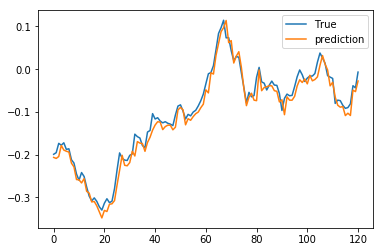

In [9]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='prediction')
ax.legend()
plt.show()